# 8-Puzzle 

 8-Puzzle es un problema inventado y popularizado por Noyes Palmer Chapman en 1870. Este consiste es un arreglo de 3x3 con ocho tejas etiquetdas del 1 al 8 y un hueco. La meta es rearreglar las tejas de tal forma que queden en orden. Se pueden desplazar las tejas horizontal y verticalmente hacia el hueco.
 
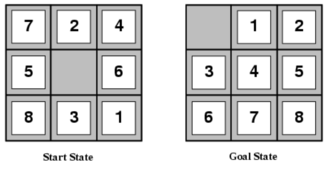

- El estado esta dado por la posición de las tejas
- La acción consiste en mover una de las tejas al hueco
- Meta: consiste en alcanzar el estado final
- Costo unitario por movimiento.

Para definir una búsqueda no informada utilizando la libraria **SimpleSearch** debemos implementar las funciones sucesors y meta. La función para generar los sucesores recibirá un un nodo(recuerden que el nodo tiene un estado!) y regresará la lista de nodos con los estados siguientes.

La representación del estado es abstracta y para este caso la definiremos como una lista de tuples. Por ejemplo para los estados de la figura anterior los estados sería los siguientes (el hueco lo representamos con un 0):

In [1]:
estado1=((7,2,4),(5,0,6),(8,3,1)) # utilizamos tuples porque nos intersa que sean inmutables
estado2=((0,1,2),(3,4,5),(6,7,8)) # si son inmutables podemos aplicarles la función hash

lo anterior sólo define el estado el cual es parte de la estructura de nodo. Un nodo de **SimpleSearch** tiene los siguientes atributos:

  - state: el estado 
  - parent: el padre del nodo, es decir quien lo generó (default "None"). 
  - depth: La profndidad a la que se descubrió el nodo (default 0).
  - cost: Lo que costo del nodo (default 0).
  - delta: Valor de la heurística para el nodo (default 0).
  - op: Descripción de la que se utilizón para generar el nodo (default "")


Para comnezar a utilizar la librería se debe importar

In [31]:
import sys,os
baile_path=os.path.abspath(os.path.join("..","src"))
if not baile_path in sys.path:
    sys.path.append(baile_path)
import SimpleSearch as ss

una vez importada la librería podemos definir un nodo como sigue:

In [3]:
#sólo incluimos el valor de state
inicial=ss.node(((7,2,4),(5,0,6),(8,3,1))) # el resto de los atributos toma el valor default

In [4]:
#imprimimos algunos de sus valores
print("El estado es: ", inicial.state) 
print("El padre de incial es: ", inicial.parent) 
print("Su profundidad es: ", inicial.getDepth()) 

El estado es:  ((7, 2, 4), (5, 0, 6), (8, 3, 1))
El padre de incial es:  None
Su profundidad es:  0


Para generar los sucesores lo que haremos será mover el hueco (0). Si el 0 se encuentra en la posición $(i,j)$, puede realizar a lo más cuatro  acciones (e.i. el factor de ramaje $b=4$): 

- Mover a la derecha: intercambiar con $(i+1,j)$,
- mover hacia la izuierda: intercambiar con $(i-1,j)$
- mover hacia abajo: intercambiar con $(i,j+1)$ y 
- mover hacia arriba: intercambiar con $(i,j-1)$

todos los moviemiento siempre y cuando no se salga de tablero, es decir  $0\leq i,j < 3$. Una posible implementación de sucesor es la siguiente:

In [5]:
def sucesor9Puzzle(a):
    board=a.state # El estado actual
    #buscamos el 0
    i,j=[(i,j) for i in range(len(board)) for j in range(len(board[i])) if board[i][j]==0][0]
    # las posibles posiciones
    left,right=(i,j-1,"izquierda"),(i,j+1,"derecha")
    up,down=(i+1,j,"abajo"),(i-1,j,"arriba")
    siguientes=[]
    for x,y,op in [up,down,left,right]: 
        if  0<=y<len(board[0]) and 0<=x<len(board): #checamos que no se salga del tablero
            nboard=[list(bx[:]) for bx in board] # hacemos una copia del estado actual
            nboard[x][y],nboard[i][j]=board[i][j],board[x][y] # intercambiamos el 0
            nboard=tuple([tuple(row) for row in nboard]) # hacemos el estado inmutable
            siguientes.append(ss.node(nboard,op=op,depth=a.depth+1,parent=a))# creamos el nodo
    return siguientes # regresamos la lista

una vez definda al utilizarla nos regresa una lista de nodos (recibe un nodo).

In [6]:
sucesor9Puzzle(inicial)

si queremos ver su estado y la operación que lo genero...

In [7]:
[(x.state,x.op) for x in sucesor9Puzzle(inicial)]

[(((7, 2, 4), (5, 3, 6), (8, 0, 1)), 'abajo'),
 (((7, 0, 4), (5, 2, 6), (8, 3, 1)), 'arriba'),
 (((7, 2, 4), (0, 5, 6), (8, 3, 1)), 'izquierda'),
 (((7, 2, 4), (5, 6, 0), (8, 3, 1)), 'derecha')]

para este problema el estado meta se define de forma explicita, por los que la función meta debe recibir dos estados: inicial y final. Cuando la meta del problema sea implicita, sólo se recibe el estado incial. 

In [8]:
# La función meta debe regresa una valor booleano (True o False)
# recuerde cuando ponemos *var estamos diciendo que a función puede tener
# uno, dos o más parametros
def goal9Puzzle(*states):  # goal9Puzzle(inicial,final)
    a=states[0] # el estado incial es el primer parámetro
    b=states[1] # el estado inicia es el segundo parámetro
    return a.state==b.state # solo probamos que a sea igua a b

si definimos el estado final como:

In [9]:
final=ss.node(((0,1,2),(3,4,5),(6,7,8)),op="final")

probamos nuestra funcion meta

In [10]:
print(goal9Puzzle(inicial,final)) # inicial=final
print(goal9Puzzle(final,final)) # inicial=final


False
True


ya tenemos todo para ejecutar búsquedas por amplitud(**bfs**) y profundidad(**dfs**). A continuación definimos amabas:

In [11]:
bfs=ss.BlindSearch(inicial,sucesor9Puzzle,goal9Puzzle,goal_state=final,strategy="bfs")
dfs=ss.BlindSearch(inicial,sucesor9Puzzle,goal9Puzzle,goal_state=final,strategy="dfs")

para ejecutar la búsqueda llamamos al método **find**. Como resultado imprime el número de iteraciones y regresa el nodo con la solución si existe.

In [12]:
resb=bfs.find() # Ejecutamos una búsqueda por amplitud

finished in 172604 iterations


podemos ver el estado final:

In [13]:
print(resb.state)

((0, 1, 2), (3, 4, 5), (6, 7, 8))


en este caso lo que nos interesa es la ruta que seguimos para llegar a la meta. Lo anterior lo podemos realizar utilizando el método **getPath**

In [14]:
seqb=resb.getPath()

In [15]:
print("La secuencia consta de %s pasos" %len(seqb))

La secuencia consta de 27 pasos


In [16]:
seqb # la desplegamos

[(((7, 2, 4), (5, 0, 6), (8, 3, 1)), '', 0),
 (((7, 2, 4), (0, 5, 6), (8, 3, 1)), 'izquierda', 1),
 (((0, 2, 4), (7, 5, 6), (8, 3, 1)), 'arriba', 2),
 (((2, 0, 4), (7, 5, 6), (8, 3, 1)), 'derecha', 3),
 (((2, 5, 4), (7, 0, 6), (8, 3, 1)), 'abajo', 4),
 (((2, 5, 4), (7, 3, 6), (8, 0, 1)), 'abajo', 5),
 (((2, 5, 4), (7, 3, 6), (0, 8, 1)), 'izquierda', 6),
 (((2, 5, 4), (0, 3, 6), (7, 8, 1)), 'arriba', 7),
 (((2, 5, 4), (3, 0, 6), (7, 8, 1)), 'derecha', 8),
 (((2, 5, 4), (3, 6, 0), (7, 8, 1)), 'derecha', 9),
 (((2, 5, 0), (3, 6, 4), (7, 8, 1)), 'arriba', 10),
 (((2, 0, 5), (3, 6, 4), (7, 8, 1)), 'izquierda', 11),
 (((0, 2, 5), (3, 6, 4), (7, 8, 1)), 'izquierda', 12),
 (((3, 2, 5), (0, 6, 4), (7, 8, 1)), 'abajo', 13),
 (((3, 2, 5), (6, 0, 4), (7, 8, 1)), 'derecha', 14),
 (((3, 2, 5), (6, 4, 0), (7, 8, 1)), 'derecha', 15),
 (((3, 2, 5), (6, 4, 1), (7, 8, 0)), 'abajo', 16),
 (((3, 2, 5), (6, 4, 1), (7, 0, 8)), 'izquierda', 17),
 (((3, 2, 5), (6, 0, 1), (7, 4, 8)), 'arriba', 18),
 (((3, 2, 5)

In [17]:
resd=dfs.find() # Ejecutamos una búsqueda por profundidad

finished in 11766 iterations


In [18]:
seqd=resd.getPath()

In [19]:
print("La longitud de la secuancia es: %s" %len(seqd))

La longitud de la secuancia es: 11451


La secuencia es demasiado larga! mejor no la desplegamos...

Podemos medir el tiempo de ejecución de cada estrategia como agregando **%time** al inicio de la instrucción

In [20]:
%time bfs.find() # tiempo de ejecución para una búsqueda por amplitud

finished in 172604 iterations
CPU times: user 8.88 s, sys: 132 ms, total: 9.01 s
Wall time: 10.4 s


In [21]:
%time dfs.find() # tiempo de ejecución para una búsqueda por profundidad

finished in 11766 iterations
CPU times: user 727 ms, sys: 18.2 ms, total: 746 ms
Wall time: 942 ms


## Ejercicio 
Completar la tabla suponiendo la siguiente entrada:

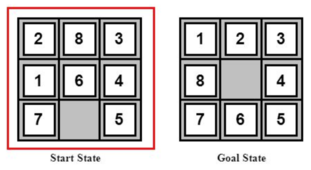

|Estrategia de Búsqueda|# nodos visitados|Tiempo de ejecución|Longitud de la solución|
|:--------------------:|----------------:|------------------:|----------------------:|
|BFS|-|-|-|
|DFS|-|-|-|

- ¿Qué se puede concluir de la tabla?
- ¿Utilizar sólo un caso para compararlos es válido/justo?
    - Si su respuesta es "no" ¿Cómo podría compararlos de forma más justa/válida?
    - Si su respuesta es "sí" Explique
